In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [13]:
tesla = pd.read_csv(r"C:\Users\nagkp\Downloads\Tesla.csv")
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,1/7/2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2/7/2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,6/7/2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [14]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [16]:
tesla


,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,1/7/2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2/7/2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,6/7/2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2188,11/3/2019,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,12/3/2019,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,13-03-2019,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2191,14-03-2019,292.450012,295.390015,288.290009,289.959991,289.959991,7074200


In [25]:
def convert_mixed_date(date):
    try:
        return pd.to_datetime(date, format="%d-%m-%Y")  # Try DD-MM-YYYY
    except ValueError:
        try:
            return pd.to_datetime(date, format="%m/%d/%Y")  # Try MM/DD/YYYY
        except ValueError:
            try:
                return pd.to_datetime(date, format="%Y-%m-%d")  # Try YYYY-MM-DD
            except ValueError:
                return pd.NaT  # Return NaT if nothing works

tesla['Date'] = tesla['Date'].apply(convert_mixed_date)


In [28]:
print(tesla['Date'].head())
print(tesla['Date'].dtype)

0   2010-06-29
1   2010-06-30
2   2010-01-07
3   2010-02-07
4   2010-06-07
Name: Date, dtype: datetime64[ns]
datetime64[ns]


In [31]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}') 
print(f'Total days = {(tesla.Date.max()-tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-01-07 00:00:00 2019-12-03 00:00:00
Total days = 3617 days


In [32]:
tesla.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2193,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,2014-11-05 03:05:49.658002944,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
min,2010-01-07 00:00:00,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,2012-08-31 00:00:00,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,2014-11-02 00:00:00,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,2017-01-08 00:00:00,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,2019-12-03 00:00:00,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07
std,NaN,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06


<Axes: >

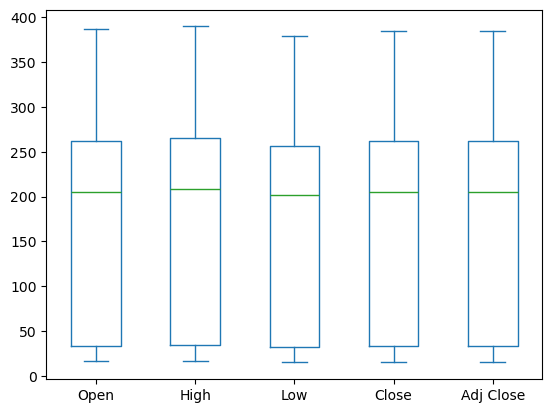

In [33]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [34]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

tesla_data = [{'x':tesla['Date'], 'y':tesla['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)

C:\Users\nagkp\AppData\Local\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



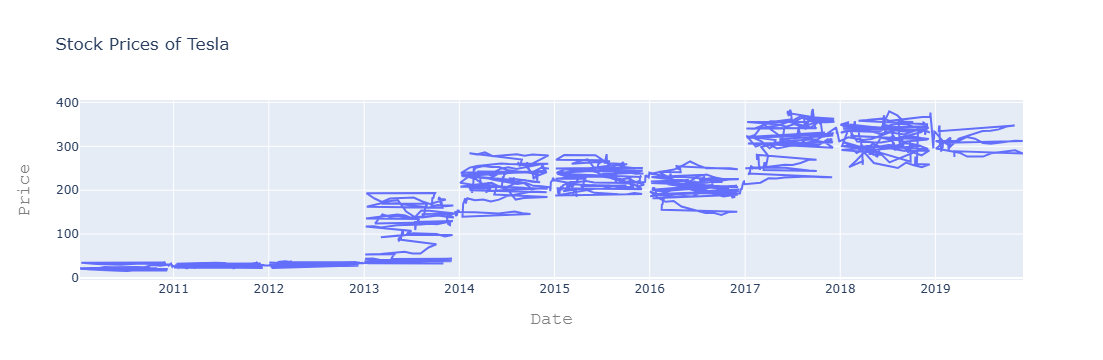

In [35]:
#plot(plot) #plotting offline
iplot(plot)